<a href="https://colab.research.google.com/github/raresrosca/Autoencoder/blob/master/CustomReluFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(0, 20, 1000), dim=1)  # x data (tensor), shape=(1000, 1)
y = torch.sin(x) + 0.0*torch.rand(x.size())                 # noisy y data (tensor), shape=(1000, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)



In [0]:
import torch.nn as nn

class cReLU(nn.Module):
  def __init__(self):
    super().__init__()
    
  def forward(self, input):
    self.zeros = torch.zeros(input.shape[0],input.shape[1])
    self.ones = torch.ones(input.shape[0], input.shape[1])
    return torch.max(input + 0.0*self.ones , self.zeros)

In [0]:
# define the simple model
net = torch.nn.Sequential(
        torch.nn.Linear(1, 200),
        cReLU(),
        torch.nn.Linear(200, 100),
        cReLU(),
        torch.nn.Linear(100, 1),
    )

In [0]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.005)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

BATCH_SIZE = 200

In [0]:
torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

my_losses = []
my_epochs = []

In [128]:
# start training
for epoch in range(600):
    running_loss = 0.0
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     # input x and predict based on x

        loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        running_loss += loss.item()

    print('[%d] loss: %.3f' %(epoch+1, running_loss))
    my_losses.append(running_loss)
    my_epochs.append(epoch+1)

[1] loss: 35.509
[2] loss: 9.888
[3] loss: 6.144
[4] loss: 3.794
[5] loss: 3.031
[6] loss: 2.772
[7] loss: 2.519
[8] loss: 2.378
[9] loss: 2.233
[10] loss: 2.189
[11] loss: 2.082
[12] loss: 2.153
[13] loss: 2.124
[14] loss: 2.055
[15] loss: 2.037
[16] loss: 2.025
[17] loss: 2.017
[18] loss: 2.010
[19] loss: 1.995
[20] loss: 1.990
[21] loss: 1.983
[22] loss: 1.971
[23] loss: 1.972
[24] loss: 1.982
[25] loss: 1.964
[26] loss: 1.979
[27] loss: 1.958
[28] loss: 1.965
[29] loss: 1.926
[30] loss: 1.932
[31] loss: 1.940
[32] loss: 1.935
[33] loss: 1.882
[34] loss: 1.953
[35] loss: 1.882
[36] loss: 1.902
[37] loss: 1.889
[38] loss: 1.853
[39] loss: 2.065
[40] loss: 2.000
[41] loss: 1.865
[42] loss: 1.882
[43] loss: 1.815
[44] loss: 1.803
[45] loss: 1.808
[46] loss: 1.787
[47] loss: 1.784
[48] loss: 1.775
[49] loss: 1.771
[50] loss: 1.759
[51] loss: 1.786
[52] loss: 1.805
[53] loss: 1.842
[54] loss: 1.774
[55] loss: 1.731
[56] loss: 1.722
[57] loss: 1.720
[58] loss: 1.714
[59] loss: 1.709
[60] 

Text(0, 0.5, 'loss function')

<Figure size 432x288 with 0 Axes>

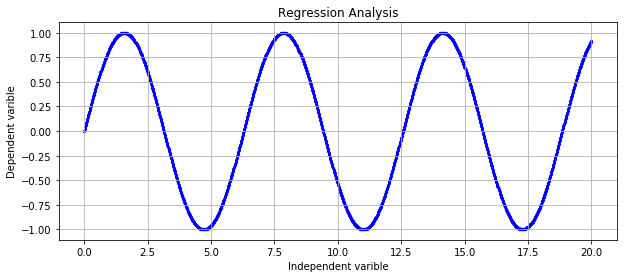

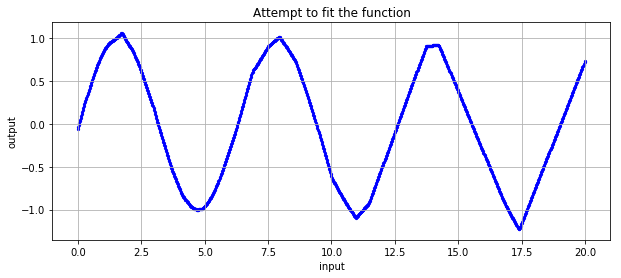

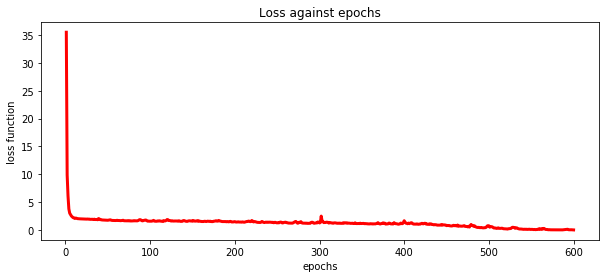

In [129]:
plt.figure(1)
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue", s = 5)
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.grid(True)
#plt.show()

plt.figure(2)
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), net(x).data.numpy(), color = "blue", s = 5)
plt.title('Attempt to fit the function')
plt.xlabel('input')
plt.ylabel('output')
plt.grid(True)
#plt.savefig('curve200_myRelushiftedx.png')
#plt.show()

plt.figure(3)
plt.figure(figsize=(10,4))
plt.plot(my_epochs, my_losses, color = "red", linewidth = 3)
plt.title('Loss against epochs')
plt.xlabel('epochs')
plt.ylabel('loss function')
#plt.show()